Initialise!

In [1]:
using Queryverse
using DataFrames
using CSV
using PlotlyJS
using Dates

WebIO._IJuliaInit()

Load Traffic Data CSV!

In [2]:
traffic_data = CSV.read("Traffic/Riccarton Road 2020_09_17.csv", DataFrame)

Row,Hour,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Weekday,Weekend,All Days
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,0,109,124,146,199,151,307,328,146,318,195
2,1,36,73,89,89,75,186,239,72,213,112
3,2,37,31,52,79,61,117,188,52,153,81
4,3,48,68,36,64,47,81,151,53,116,71
5,4,60,75,72,110,88,67,94,81,81,81
6,5,155,171,183,164,156,102,95,166,99,147
7,6,502,494,464,490,487,226,172,487,199,405
8,7,858,929,917,864,890,356,241,892,299,722
9,8,1089,1122,1039,1150,1181,624,443,1116,534,950


Collect useful data

In [3]:
days = names(traffic_data)[2:8] ;
traffic_collated = stack(traffic_data, days)[:,[1,5,6]]

Row,Hour,variable,value
,Int64,String,Int64
1,0,Mon,109
2,1,Mon,36
3,2,Mon,37
4,3,Mon,48
5,4,Mon,60
6,5,Mon,155
7,6,Mon,502
8,7,Mon,858
9,8,Mon,1089


Rearrange and rename columns to something reasonable

In [4]:
traffic_collated[!, [2,1,3]]
rename!(traffic_collated, :variable => :Day, :value => :Count)

Row,Hour,Day,Count
,Int64,String,Int64
1,0,Mon,109
2,1,Mon,36
3,2,Mon,37
4,3,Mon,48
5,4,Mon,60
6,5,Mon,155
7,6,Mon,502
8,7,Mon,858
9,8,Mon,1089


Plot Traffic Data for Riccarton Road

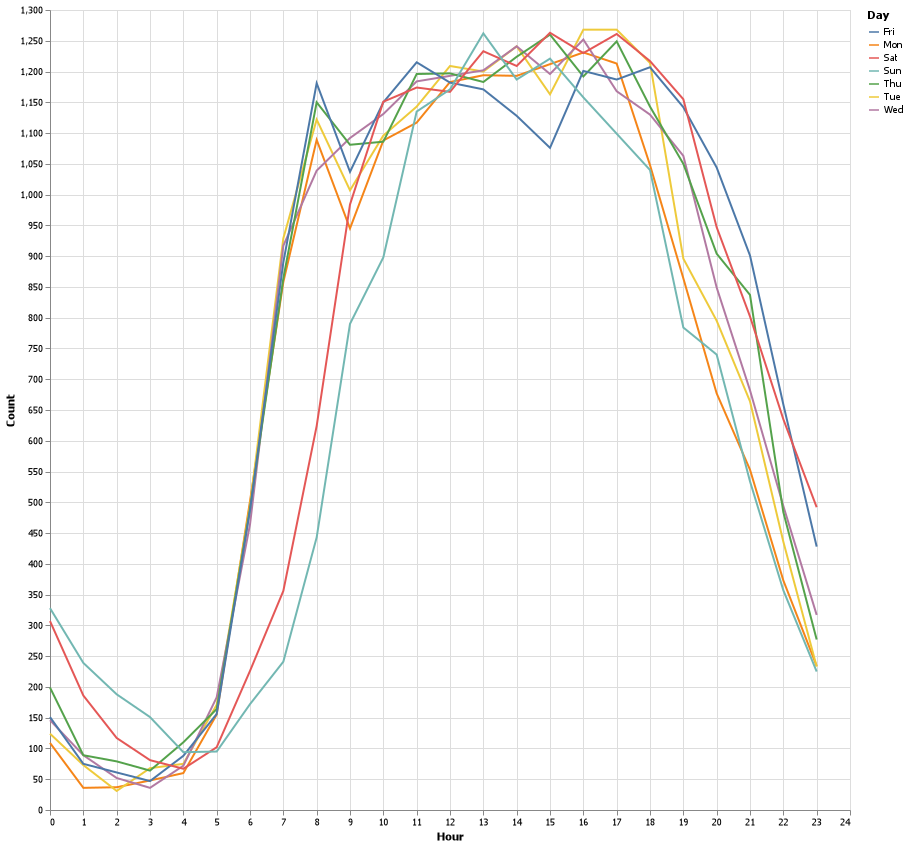

In [5]:
traffic_collated |>
    @vlplot(
        :line, 
        x = :Hour, 
        y = :Count,
        color = :Day,
        width=800,height=800,
        )

Import Power Data!

In [27]:
power_data = CSV.read("Power Usage/Zone Data (16 Sep - 12 Oct) [5 intervals].csv", DataFrame);

Adjust Data to be useable by plotting

In [28]:
rename!(power_data, Symbol("NZ TOTAL(MW)") => :Usage_MW)
power_data[!,1] = [parse(DateTime, x, dateformat"dd uuu yyy HH:MM") for x in power_data[!, 1]]
transform!(power_data, :Date => ByRow(x -> (Date(x), Time(x))) => [:Date, :Time])
power_data = power_data[!, [1,4,2]]

Row,Date,Time,Usage_MW
,Date,Time,Float64
1,2023-09-16,00:00:00,4289.53
2,2023-09-16,00:05:00,4253.13
3,2023-09-16,00:10:00,4222.4
4,2023-09-16,00:15:00,4183.81
5,2023-09-16,00:20:00,4166.43
6,2023-09-16,00:25:00,4135.74
7,2023-09-16,00:30:00,4113.43
8,2023-09-16,00:35:00,4086.84
9,2023-09-16,00:40:00,4064.81


In [29]:
plot(
    power_data, x=:Time, y=:Usage_MW, color=:Date,
    Layout(
        xaxis=attr(dtick=12, tickformat="%H")
    )
)

data: [
  "scatter with fields legendgroup, marker, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, name, showlegend, type, x, xaxis, y, and yaxis"
]

layout: "layout with fields legend, margin, template, xaxis, and yaxis"